<a href="https://colab.research.google.com/github/dawoodwasif/Object-Detection-Model-Comparison-Toolkit/blob/main/Custom_training_YOLOv6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Clone repo and install dependencies

In [ ]:
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 1502, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 1502 (delta 28), reused 58 (delta 22), pack-reused 1431
Receiving objects: 100% (1502/1502), 14.63 MiB | 31.01 MiB/s, done.
Resolving deltas: 100% (805/805), done.
/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 32.6 MB/s 
     |████████████████████████████████| 235 kB 67.1 MB/s 
     |████████████████████████████████| 51 kB 7.7 MB/s 


In [ ]:
%cd /content/YOLOv6

/content/YOLOv6


In [ ]:
! mkdir PMS
%cd PMS

/content/YOLOv6/PMS


## 2. Download dataset

In [ ]:
!curl -L "https://app.roboflow.com/ds/d79xwJBzIp?key=MqhCKXAUh2" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3033      0 --:--:-- --:--:-- --:--:--  3043
100 44.6M  100 44.6M    0     0  46.9M      0 --:--:-- --:--:-- --:--:--  118M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_9539_jpg.rf.af9ef0c4d68f861e93eebab8b6263b5e.jpg  
 extracting: test/images/IMG_9549_jpg.rf.94dd57094b08740bf3f2b0ab7826dd92.jpg  
 extracting: test/images/IMG_9600_jpg.rf.8bdcacb0a00351e094a16fc854d1ff5f.jpg  
 extracting: test/images/IMG_9621_jpg.rf.7bec744a978468399cb0552f35c74fc5.jpg  
 extracting: test/images/IMG_9637_jpg.rf.9fc008447a2243698c6355e500a23cf0.jpg  
 extracting: test/images/IMG_9638_jpg.rf.8528f86754508343fe6c6e2b283252eb.jpg  
 extracting: test/imag

## 3. Change dataset format

In [ ]:
!mkdir images
%cd images
!mkdir train
!mkdir valid
!mkdir test

%cd ../

!mkdir labels
%cd labels 
!mkdir train
!mkdir valid
!mkdir test

%cd ../


/content/YOLOv6/PMS/images
/content/YOLOv6/PMS
/content/YOLOv6/PMS/labels
/content/YOLOv6/PMS


In [ ]:
import os

In [ ]:
source = 'train/images/'
destination = 'images/train/'
allfiles = os.listdir(source)
for f in allfiles:
    os.rename(source + f, destination + f)

In [ ]:
source = 'train/labels/'
destination = 'labels/train/'
allfiles = os.listdir(source)
for f in allfiles:
    os.rename(source + f, destination + f)

In [ ]:
source = 'test/images/'
destination = 'images/test/'
allfiles = os.listdir(source)
for f in allfiles:
    os.rename(source + f, destination + f)

In [ ]:
source = 'test/labels/'
destination = 'labels/test/'
allfiles = os.listdir(source)
for f in allfiles:
    os.rename(source + f, destination + f)

In [ ]:
source = 'valid/images/'
destination = 'images/valid/'
allfiles = os.listdir(source)
for f in allfiles:
    os.rename(source + f, destination + f)

In [ ]:
source = 'valid/labels/'
destination = 'labels/valid/'
allfiles = os.listdir(source)
for f in allfiles:
    os.rename(source + f, destination + f)

In [ ]:
! rm -r train test valid
%cd ../

# change data.yaml file and replace this at start:
# train: PMS/images/train
# val: PMS/images/valid
# test: PMS/images/test


/content/YOLOv6


## 4. Train Model

In [ ]:
!python tools/train.py --batch 32 --conf configs/yolov6s.py --epochs 150 --img-size 416 --data PMS/data.yaml --device 0 

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='PMS/data.yaml', device='0', dist_url='env://', epochs=150, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp3', workers=8, world_size=1, write_trainbatch_tb=False)

Train: Final numbers of valid images: 276/ labels: 276. 
0.0s for dataset initialization.
Convert to COCO format
100% 80/80 [00:00<00:00, 7194.50it/s]
Convert to COCO format finished. Resutls saved in PMS/annotations/instances_valid.json
Val: Final numbers of valid images: 80/ labels: 80. 
0.2s for dataset initialization.
Model: Model(
  (backbone): EfficientRep(
    (stem): RepVGGBlock(
      (nonlinearity): ReLU(inplace=True)
      (se): Identity()
      (rbr_dense): Sequential(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), st

## 5. Detect and test model

In [ ]:
!python tools/infer.py --yaml PMS/data.yaml --img-size 416 --weights runs/train/exp3/weights/best_ckpt.pt --source PMS/images/test/ --device 0

Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_dir=None, save_img=True, save_txt=False, source='PMS/images/test/', view_img=False, weights='runs/train/exp3/weights/best_ckpt.pt', yaml='PMS/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp3/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
100% 40/40 [00:01<00:00, 29.51it/s]
Results saved to runs/inference/exp


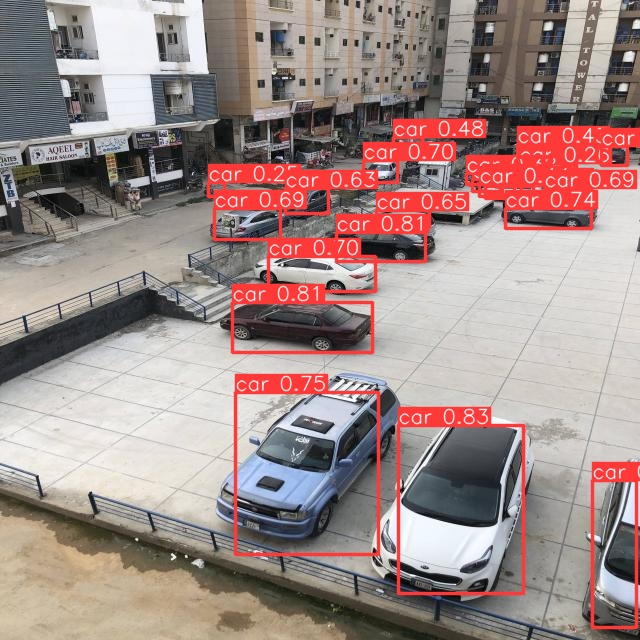

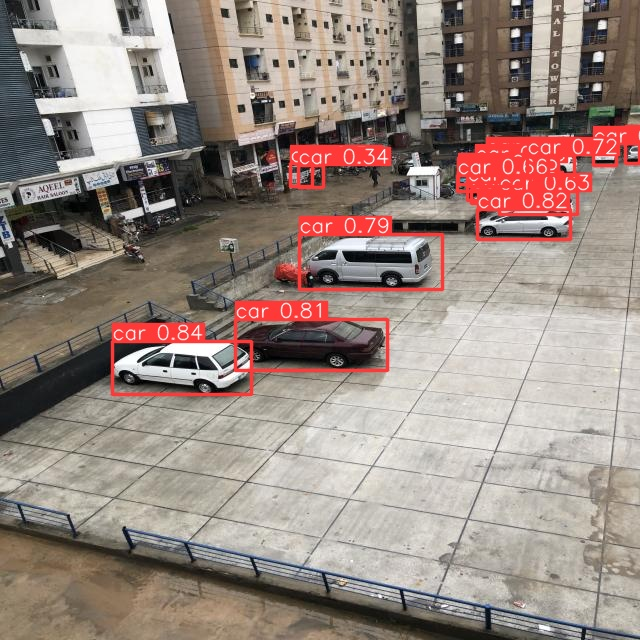

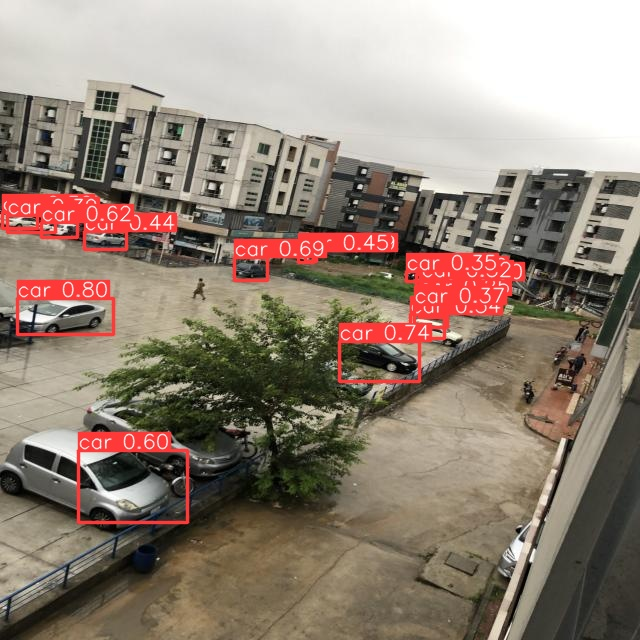

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
## make new data_eval.yaml file
## replace val with test directory
!python tools/eval.py --data data_eval.yaml --batch 32 --weights runs/train/exp3/weights/best_ckpt.pt --task val 

Namespace(batch_size=32, conf_thres=0.001, data='data_eval.yaml', device='0', half=False, img_size=640, iou_thres=0.65, name='exp', save_dir='runs/val/', task='val', weights='runs/train/exp3/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp3/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 44.07
Val: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 40/40 [00:00<00:00, 2357.24it/s]
Val: Checking formats of labels with 2 process(es): 
40 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 40/40 [00:00<00:00, 2549.65it/s]
Convert to COCO format
100% 40/40 